### Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import h5py
from keras import optimizers
from keras.callbacks import EarlyStopping

### Loading Data

In [2]:
hr_df = pd.read_csv("HR_comma_sep.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Exploring the data

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Visualizing the data

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C96A74BA8>,
      dtype=object)

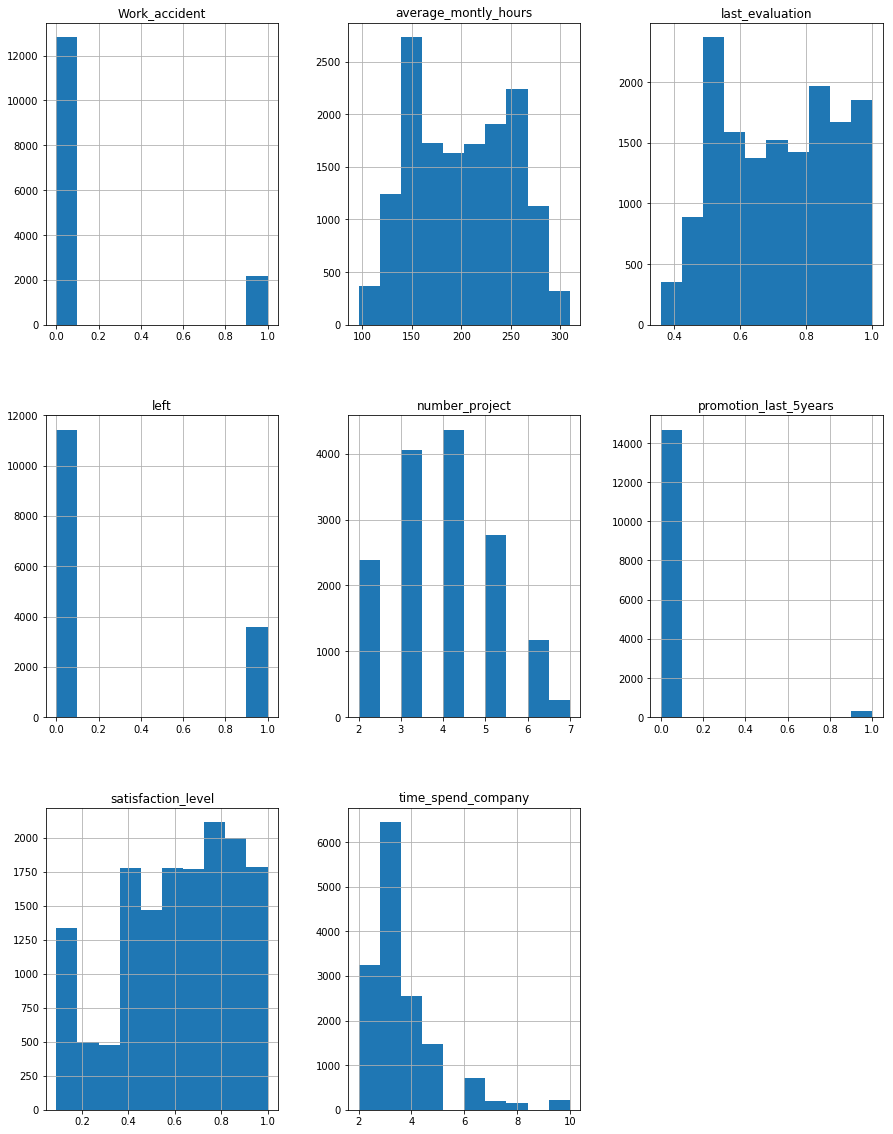

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

hr_df.hist(ax=ax)

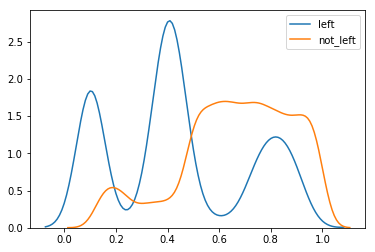

In [9]:
ax = sns.kdeplot(hr_df.loc[ (hr_df.left == 1) , "satisfaction_level" ], legend=True, label="left")
sns.kdeplot(hr_df.loc[ (hr_df.left == 0) , "satisfaction_level" ], legend=True, ax=ax, label="not_left")

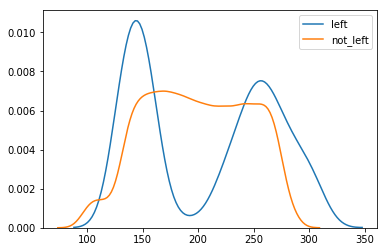

In [10]:
ax = sns.kdeplot(hr_df.loc[ (hr_df.left == 1) , "average_montly_hours" ], legend=True, label="left")
sns.kdeplot(hr_df.loc[ (hr_df.left == 0) , "average_montly_hours" ], legend=True, ax=ax, label="not_left")

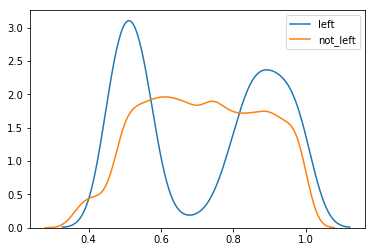

In [11]:
ax = sns.kdeplot(hr_df.loc[ (hr_df.left == 1) , "last_evaluation" ], legend=True, label="left")
sns.kdeplot(hr_df.loc[ (hr_df.left == 0) , "last_evaluation" ], legend=True, ax=ax, label="not_left")

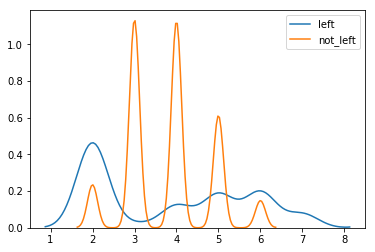

In [12]:
ax = sns.kdeplot(hr_df.loc[ (hr_df.left == 1) , "number_project" ], legend=True, label="left")
sns.kdeplot(hr_df.loc[ (hr_df.left == 0) , "number_project" ], legend=True, ax=ax, label="not_left")

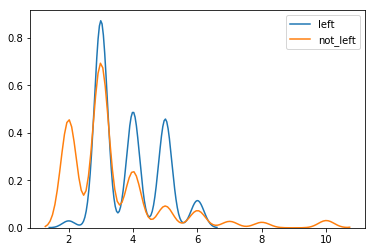

In [13]:
ax = sns.kdeplot(hr_df.loc[ (hr_df.left == 1) , "time_spend_company" ], legend=True, label="left")
sns.kdeplot(hr_df.loc[ (hr_df.left == 0) , "time_spend_company" ], legend=True, ax=ax, label="not_left")

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScal

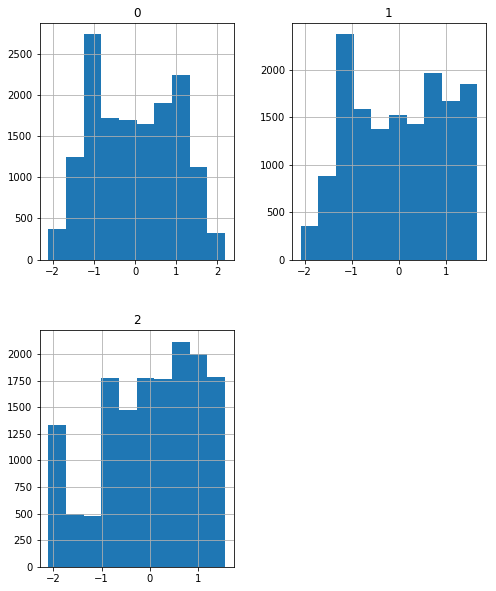

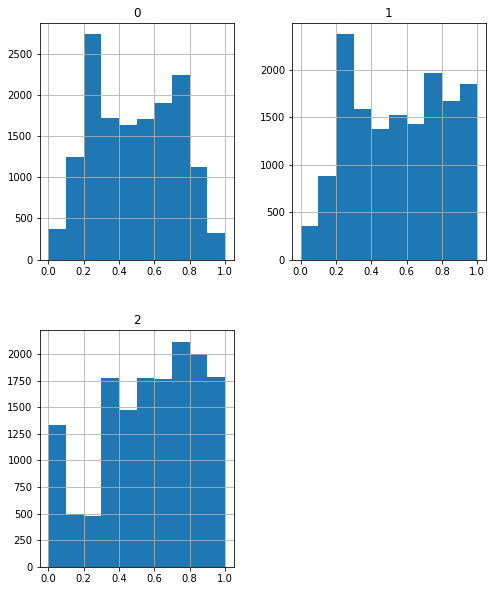

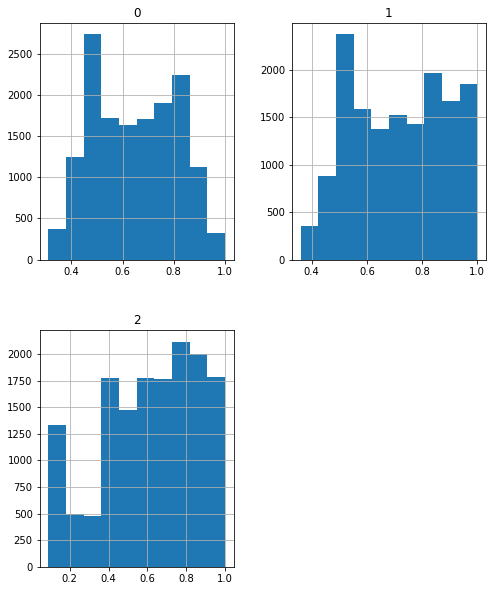

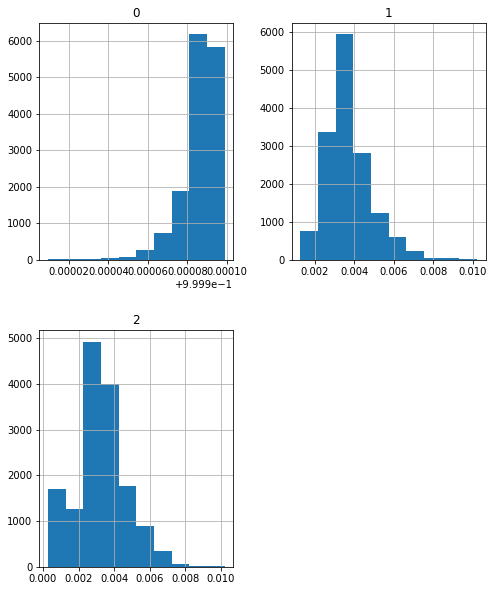

In [14]:
scalers = { 'StandardScaler' : StandardScaler(), 'MinMaxScaler' : MinMaxScaler(), 'MaxAbsScaler' : MaxAbsScaler(), 'Normalizer' : Normalizer() }

for scaler_name, scaler in scalers.items() :
    
    hr_df_scaled = scaler.fit_transform( hr_df[["average_montly_hours", "last_evaluation", "satisfaction_level"]] )
    fig = plt.figure(figsize = (8, 10))
    ax = fig.gca()
    
    pd.DataFrame(hr_df_scaled).hist(ax=ax)

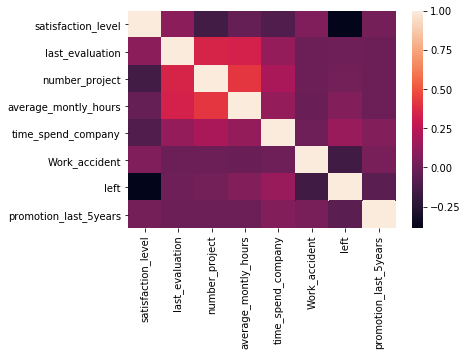

In [15]:
sns.heatmap( hr_df.corr() )

### Benchmark if everyone stays

In [16]:
X = hr_df.drop( ["sales", "salary", "left"], axis=1 )
y = hr_df["left"].values

In [17]:
y_pred = np.zeros( y.shape[0] )
accuracy_score(y, y_pred)

0.7619174611640777

### Data Cleaning

In [18]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
encoded_col = pd.get_dummies( hr_df[["sales", "salary"]] )
hr_df_encoded = pd.concat([hr_df.drop(["sales", "salary", "left"], axis=1), encoded_col], axis=1)
hr_df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Scaling the data

In [21]:
scaler = StandardScaler()
hr_df_scaled_X = scaler.fit_transform( hr_df_encoded )

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
X = hr_df_scaled_X.copy()
y = hr_df["left"].values

### Splitting the data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Modeling using available features

In [41]:
classifiers = { 'Logistic Regression' : LogisticRegression(n_jobs=-1),
               'MLPClassifier' : MLPClassifier(),
               'RandomForestClassifier' : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                                                max_depth=20, max_features='auto', max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0, min_impurity_split=None,
                                                                min_samples_leaf=1, min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                                                                oob_score=True, random_state=42, verbose=0, warm_start=False),
               'AdaBoostClassifier' : AdaBoostClassifier(),
               'BaggingClassifier' : BaggingClassifier(n_jobs=-1),
               'ExtraTreesClassifier' : ExtraTreesClassifier(n_jobs=-1),
               'GradientBoostingClassifier' : GradientBoostingClassifier() }

In [42]:
for clf_name, clf in classifiers.items() :
    
    clf.fit(X_train, y_train)
    
    prediction = clf.predict_proba(X_test) # predicting on the validation set
    prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
    prediction_int = prediction_int.astype(np.int)
    
    print( "{} : {}".format( clf_name, accuracy_score(y_test, prediction_int) ) )

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Regression : 0.7843333333333333


C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier : 0.965
RandomForestClassifier : 0.988
AdaBoostClassifier : 0.9603333333333334
BaggingClassifier : 0.981


C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier : 0.9823333333333333
GradientBoostingClassifier : 0.9736666666666667


In [27]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

### Deep Learning Model

In [34]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=150, verbose=1)
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# results = cross_val_score(estimator, X, y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
early_stopping_monitor = EarlyStopping(patience=3)
estimator.fit(X_train, y_train, validation_split=0.20)

Train on 9599 samples, validate on 2400 samples
Epoch 1/100
9599/9599 [==============================] - 3s 340us/step - loss: 0.4188 - acc: 0.8037 - val_loss: 0.2500 - val_acc: 0.9042
Epoch 2/100
9599/9599 [==============================] - 2s 179us/step - loss: 0.2451 - acc: 0.9131 - val_loss: 0.1802 - val_acc: 0.9471
Epoch 3/100
9599/9599 [==============================] - 2s 197us/step - loss: 0.1943 - acc: 0.9359 - val_loss: 0.1685 - val_acc: 0.9492
Epoch 4/100
9599/9599 [==============================] - 2s 201us/step - loss: 0.1858 - acc: 0.9403 - val_loss: 0.1751 - val_acc: 0.9492
Epoch 5/100
9599/9599 [==============================] - 2s 189us/step - loss: 0.1699 - acc: 0.9480 - val_loss: 0.1557 - val_acc: 0.9550
Epoch 6/100
9599/9599 [==============================] - 2s 199us/step - loss: 0.1656 - acc: 0.9512 - val_loss: 0.1507 - val_acc: 0.9583
Epoch 7/100
9599/9599 [==============================] - 2s 193us/step - loss: 0.1538 - acc: 0.9547 - val_loss: 0.1575 - val_acc: 

9599/9599 [==============================] - 2s 202us/step - loss: 0.0670 - acc: 0.9756 - val_loss: 0.1238 - val_acc: 0.9700
Epoch 61/100
9599/9599 [==============================] - 2s 186us/step - loss: 0.0648 - acc: 0.9776 - val_loss: 0.1310 - val_acc: 0.9704
Epoch 62/100
9599/9599 [==============================] - 2s 196us/step - loss: 0.0689 - acc: 0.9777 - val_loss: 0.1315 - val_acc: 0.9679
Epoch 63/100
9599/9599 [==============================] - 2s 200us/step - loss: 0.0680 - acc: 0.9774 - val_loss: 0.1267 - val_acc: 0.9700
Epoch 64/100
9599/9599 [==============================] - 2s 202us/step - loss: 0.0659 - acc: 0.9781 - val_loss: 0.1174 - val_acc: 0.9717
Epoch 65/100
9599/9599 [==============================] - 2s 190us/step - loss: 0.0674 - acc: 0.9771 - val_loss: 0.1311 - val_acc: 0.9683
Epoch 66/100
9599/9599 [==============================] - 2s 175us/step - loss: 0.0646 - acc: 0.9771 - val_loss: 0.1299 - val_acc: 0.9679
Epoch 67/100
9599/9599 [=======================

In [38]:
prediction = estimator.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(y_test, prediction_int)

3000/3000 [==============================] - 0s 115us/step


0.9736666666666667